# Simple Convolutional Neural Network for Image Recogntion

* The convolutional neural network used in this report is taken from the TensorFlow image classification tutorial.
* The network will be trained using the image data from the data pre-processing notebook.

In [23]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter

In [2]:
#set the working directory 
os.chdir("C:\\Users\\b9027741\\OneDrive - Newcastle University\\Masters\\Computer Science\\Machine_Learning_Project\\Data")

In [3]:
#load in the training data and labels
X_train = np.load("train/data/X_train.npy")
Y_train = np.load("train/data/Y_train.npy")

#load in the validation data and labels
X_val = np.load("train/data/X_val.npy")
Y_val = np.load("train/data/Y_val.npy")

X_test = np.load("train/data/X_test.npy")
Y_test = np.load("train/data/Y_test.npy")

In [48]:
batch_size = 128
epochs = 10
image_size = X_train.shape[1:]
output_size = 6
image_height = 161
image_width = 99

print(image_size)

(161, 99, 1)


In [6]:
X_train_scaled = X_train * (1 / 255)
X_val_scaled = X_val * (1  / 255)
X_test_scaled = X_test * (1 / 255)

In [45]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train_scaled.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_size))
model.add(Activation('softmax'))

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 161, 99, 32)       320       
_________________________________________________________________
activation_35 (Activation)   (None, 161, 99, 32)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 159, 97, 32)       9248      
_________________________________________________________________
activation_36 (Activation)   (None, 159, 97, 32)       0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 39, 24, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 39, 24, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 39, 24, 16)      

In [51]:
history = model.fit(X_train_scaled,Y_train,epochs=20,validation_data=(X_val_scaled,Y_val),
                    batch_size=batch_size,shuffle=True)

Train on 10228 samples, validate on 2557 samples
Epoch 1/20
10228/10228 [==============================] - 110s 11ms/sample - loss: 0.4618 - accuracy: 0.8335 - val_loss: 0.3110 - val_accuracy: 0.8917
Epoch 2/20
10228/10228 [==============================] - 112s 11ms/sample - loss: 0.4391 - accuracy: 0.8379 - val_loss: 0.3017 - val_accuracy: 0.8999
Epoch 3/20
10228/10228 [==============================] - 112s 11ms/sample - loss: 0.4201 - accuracy: 0.8437 - val_loss: 0.2833 - val_accuracy: 0.9030
Epoch 4/20
10228/10228 [==============================] - 112s 11ms/sample - loss: 0.4049 - accuracy: 0.8552 - val_loss: 0.2661 - val_accuracy: 0.9081
Epoch 5/20
10228/10228 [==============================] - 112s 11ms/sample - loss: 0.3992 - accuracy: 0.8559 - val_loss: 0.2780 - val_accuracy: 0.9042
Epoch 6/20
10228/10228 [==============================] - 112s 11ms/sample - loss: 0.3654 - accuracy: 0.8688 - val_loss: 0.2475 - val_accuracy: 0.9132
Epoch 7/20
10228/10228 [=====================

In [52]:
scores = model.evaluate(X_test_scaled,Y_test,verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.18540091812086307
Test accuracy: 0.9317382


1421/1 - 7s - loss: 0.2150 - accuracy: 0.9317


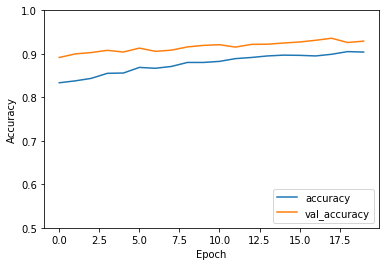

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_scaled,  Y_test, verbose=2)